## ML_practical_assignment - 05

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import xgboost as xg
from sklearn import tree
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

In [2]:
#importing the data

In [3]:
train_set = pd.read_csv("C:/Users/snopy/Favorites/Downloads/adult.data")

In [4]:
test_set = pd.read_csv("C:\\Users\\snopy\\Favorites\\Downloads\\adult.test")

In [5]:
col_labels = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
             'relationship','race','sex','capital_gain','captial_loss','hours_per_week','native_country','wage_class']

In [6]:
train_set.columns = col_labels

In [7]:
test_set.columns

Index(['|1x3 Cross validator'], dtype='object')

In [8]:
df = train_set

In [9]:
df.head()

age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  captial_loss  hours_per_week  native_country wage_class  
0             0             0              13   United-States      <=50K  
1             0             0              40   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40            Cuba      <=50K  
4             0             0              40   United-States      <=50K

In [10]:
df.shape

(32560, 15)

In [11]:
test_set

|1x3 Cross validator
25  Private      226802  11th         7   Never-married       Machine-op-inspct  Own-child       Black               Male   0    0 40  United-States               <=50K.
38  Private      89814   HS-grad      9   Married-civ-spouse  Farming-fishing    Husband         White               Male   0    0 50  United-States               <=50K.
28  Local-gov    336951  Assoc-acdm   12  Married-civ-spouse  Protective-serv    Husband         White               Male   0    0 40  United-States                >50K.
44  Private      160323  Some-college 10  Married-civ-spouse  Machine-op-inspct  Husband         Black               Male   7688 0 40  United-States                >50K.
18  ?            103497  Some-college 10  Never-married       ?                  Own-child       White               Female 0    0 30  United-States               <=50K.
...                                                                                                                                                                   ...
39  Private      215419  Bachelors    13  Divorced            Prof-specialty     Not-in-family   White               Female 0    0 36  United-States               <=50K.
64  ?            321403  HS-grad      9   Widowed             ?                  Other-relative  Black               Male   0    0 40  United-States               <=50K.
38  Private      374983  Bachelors    13  Married-civ-spouse  Prof-specialty     Husband         White               Male   0    0 50  United-States               <=50K.
44  Private      83891   Bachelors    13  Divorced            Adm-clerical       Own-child       Asian-Pac-Islander  Male   5455 0 40  United-States               <=50K.
35  Self-emp-inc 182148  Bachelors    13  Married-civ-spouse  Exec-managerial    Husband         White               Male   0    0 60  United-States                >50K.

[16281 rows x 1 columns]

In [12]:
test_set.shape

(16281, 1)

In [13]:
df.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
##EDA

In [15]:
pf = ProfileReport(df)

In [16]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

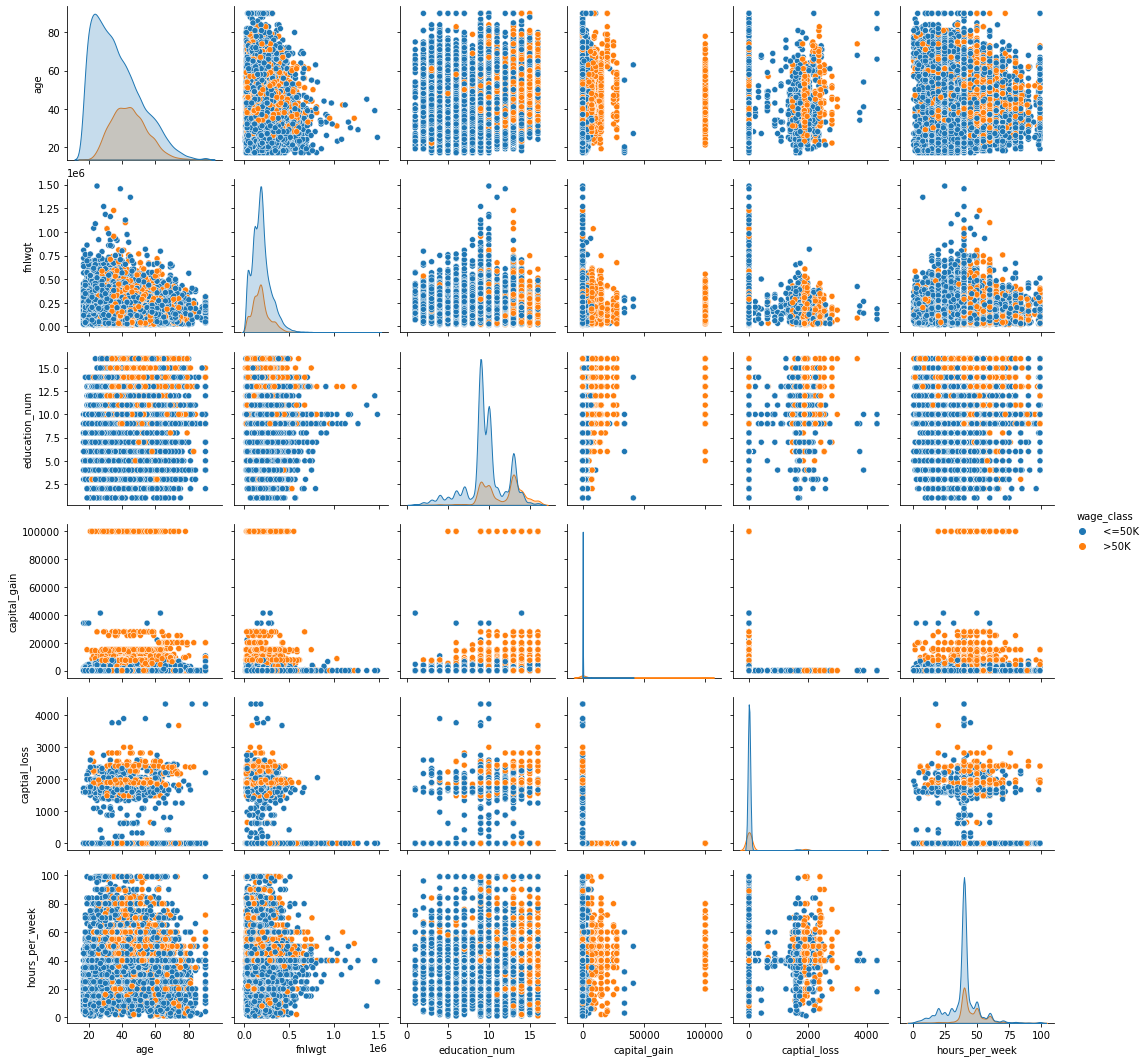

In [18]:
sns.pairplot(data=df,hue="wage_class")

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
captial_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [20]:
#Converting the categorical columns into numeric 

In [21]:
label = LabelEncoder()
for i in df.columns:
    df[i] = label.fit_transform(df[i])

In [22]:
df

age  workclass  fnlwgt  education  education_num  marital_status  \
0       33          6    2925          9             12               2   
1       21          4   14085         11              8               0   
2       36          4   15335          1              6               2   
3       11          4   19354          9             12               2   
4       20          4   17699         12             13               2   
...    ...        ...     ...        ...            ...             ...   
32555   10          4   16527          7             11               2   
32556   23          4    8079         11              8               2   
32557   41          4    7882         11              8               6   
32558    5          4   12880         11              8               4   
32559   35          5   17824         11              8               2   

       occupation  relationship  race  sex  capital_gain  captial_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0           108             0   

       hours_per_week  native_country  wage_class  
0                  12              39           0  
1                  39              39           0  
2                  39              39           0  
3                  39               5           0  
4                  39              39           0  
...               ...             ...         ...  
32555              37              39           0  
32556              39              39           1  
32557              39              39           0  
32558              19              39           0  
32559              39              39           1  

[32560 rows x 15 columns]

In [23]:
#In the above table
# 0 represents <=50K and 1 represents >50K

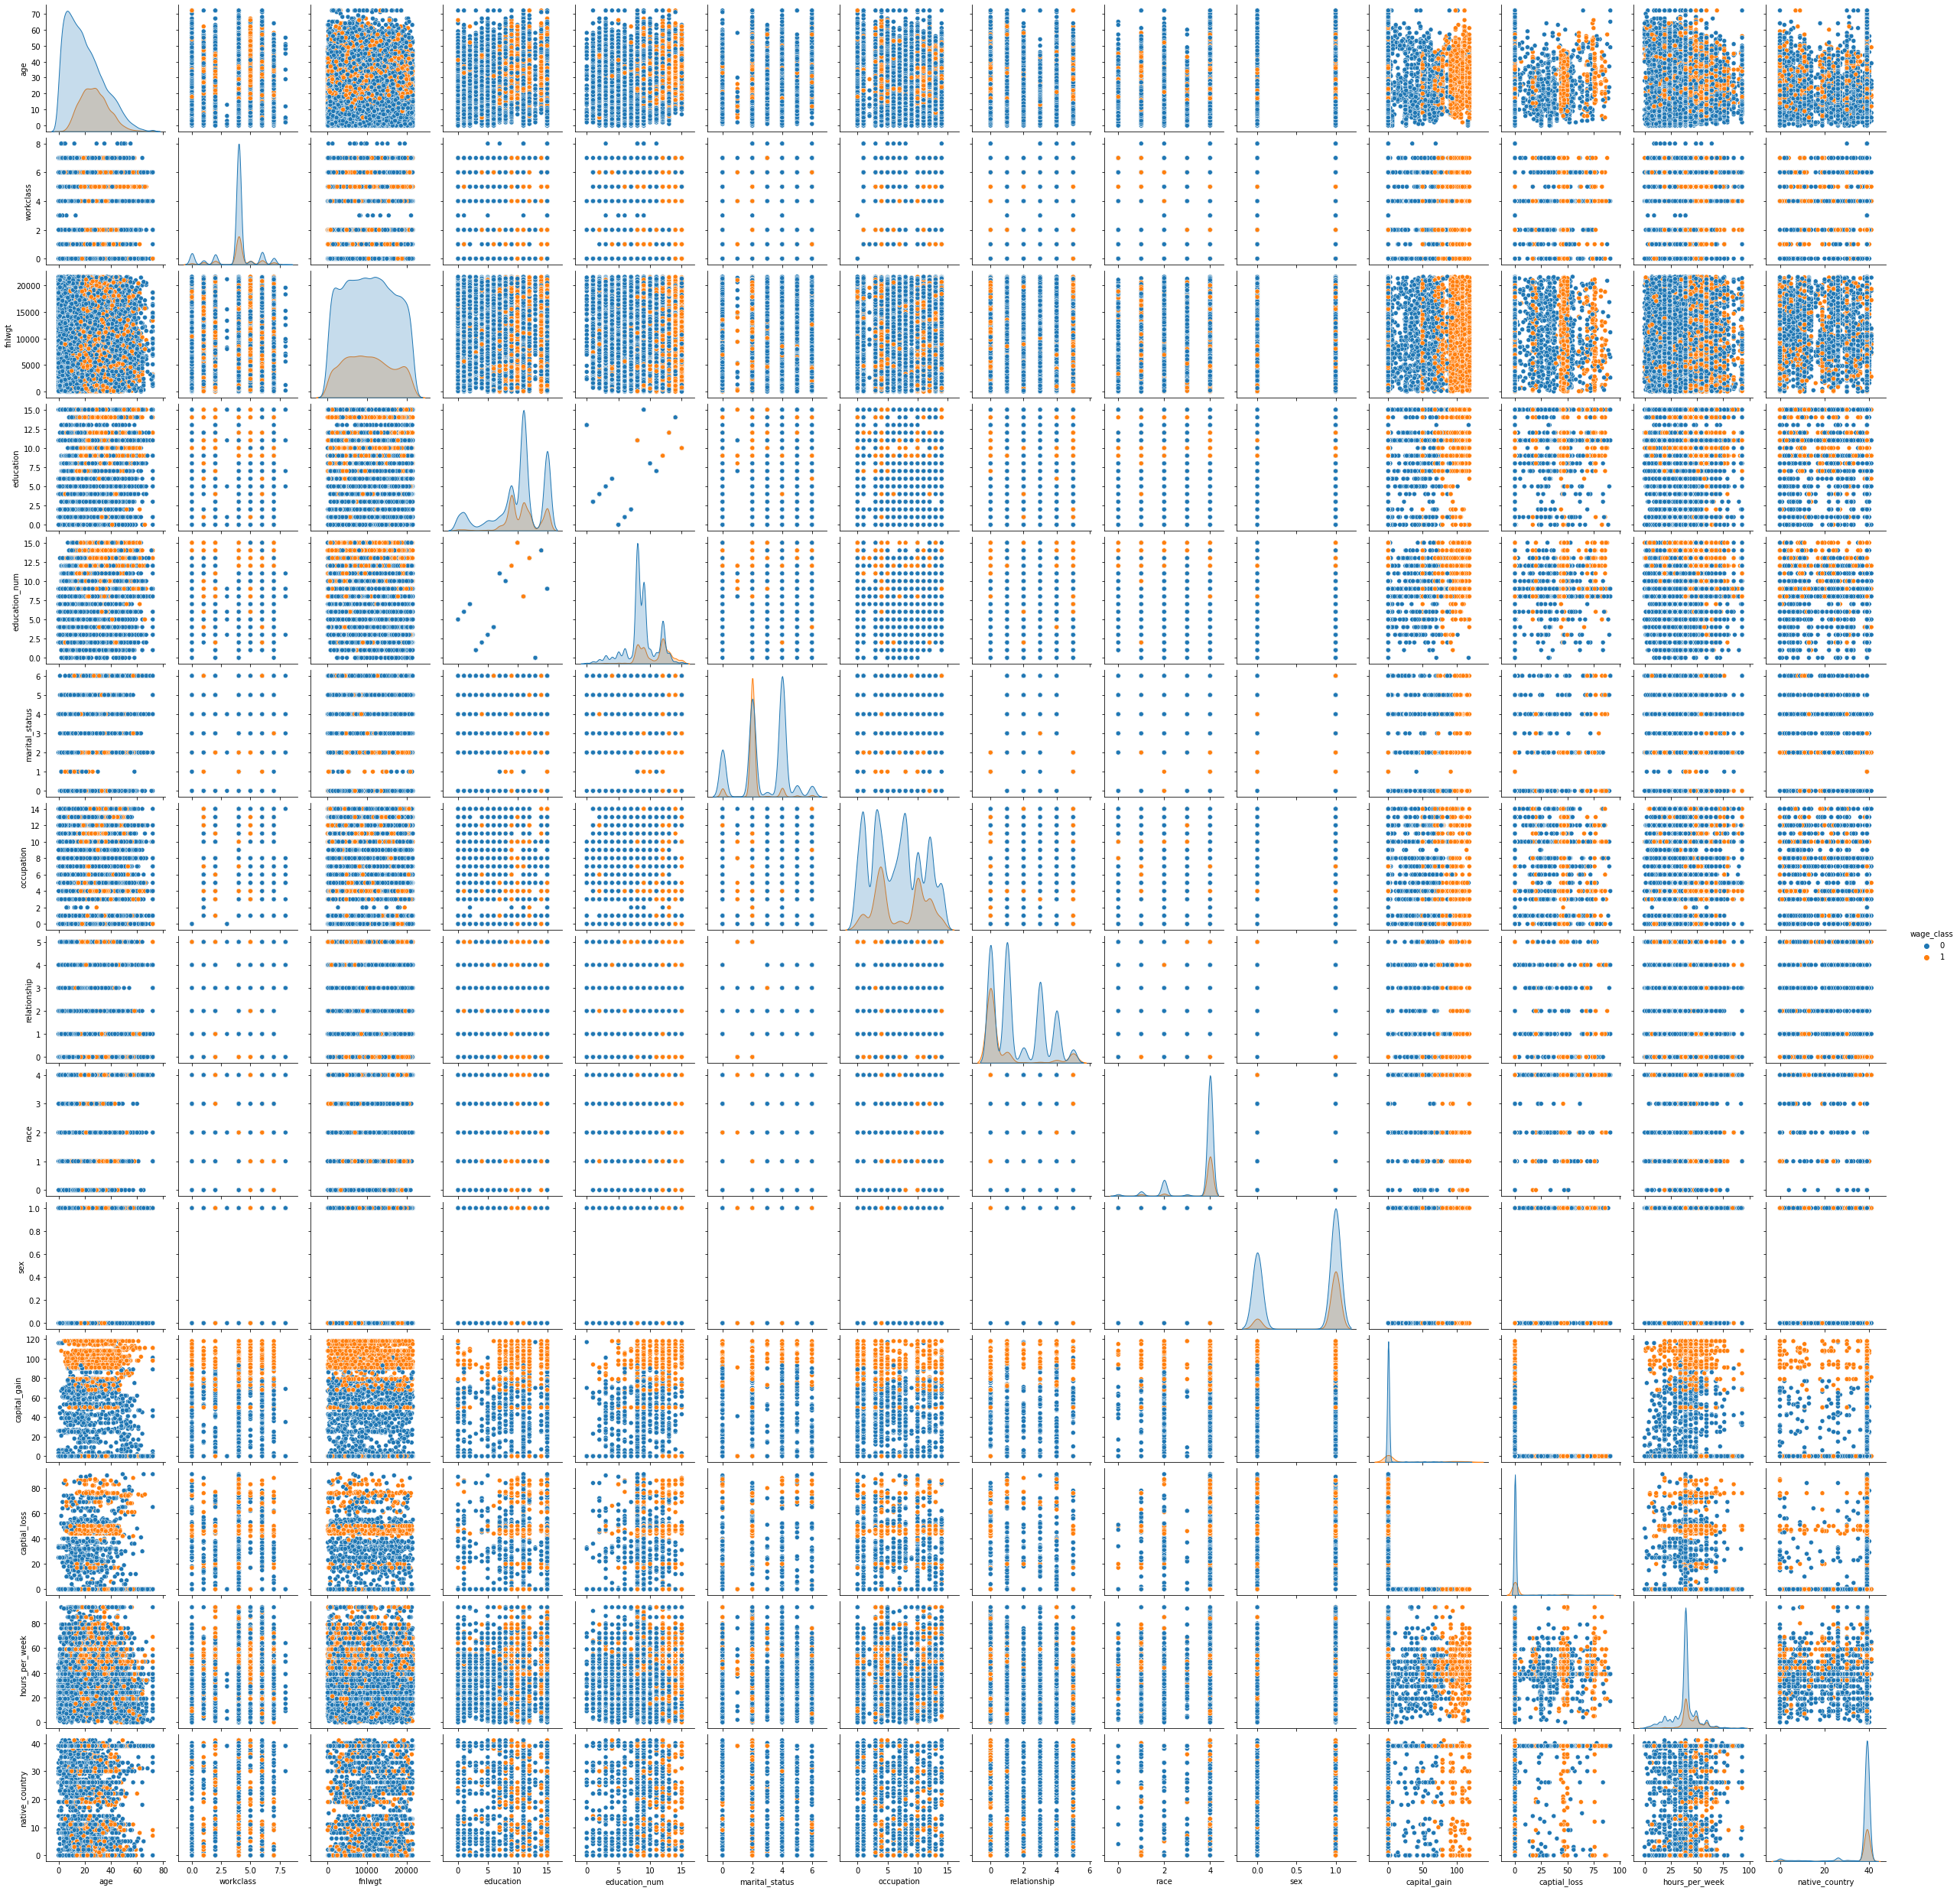

In [24]:
sns.pairplot(data=df,hue="wage_class")

In [27]:
x = df.drop(columns=["wage_class"])

In [28]:
y = df["wage_class"]

In [29]:
x

age  workclass  fnlwgt  education  education_num  marital_status  \
0       33          6    2925          9             12               2   
1       21          4   14085         11              8               0   
2       36          4   15335          1              6               2   
3       11          4   19354          9             12               2   
4       20          4   17699         12             13               2   
...    ...        ...     ...        ...            ...             ...   
32555   10          4   16527          7             11               2   
32556   23          4    8079         11              8               2   
32557   41          4    7882         11              8               6   
32558    5          4   12880         11              8               4   
32559   35          5   17824         11              8               2   

       occupation  relationship  race  sex  capital_gain  captial_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0           108             0   

       hours_per_week  native_country  
0                  12              39  
1                  39              39  
2                  39              39  
3                  39               5  
4                  39              39  
...               ...             ...  
32555              37              39  
32556              39              39  
32557              39              39  
32558              19              39  
32559              39              39  

[32560 rows x 14 columns]

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: wage_class, Length: 32560, dtype: int32

In [31]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [43]:
model = xg.XGBClassifier()
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
accuracy_score(model_pred,y_test)

0.8709167054443927

In [44]:
model.score(x_train,y_train)

0.9149667659867063

In [45]:
model.score(x_test,y_test)

0.8709167054443927

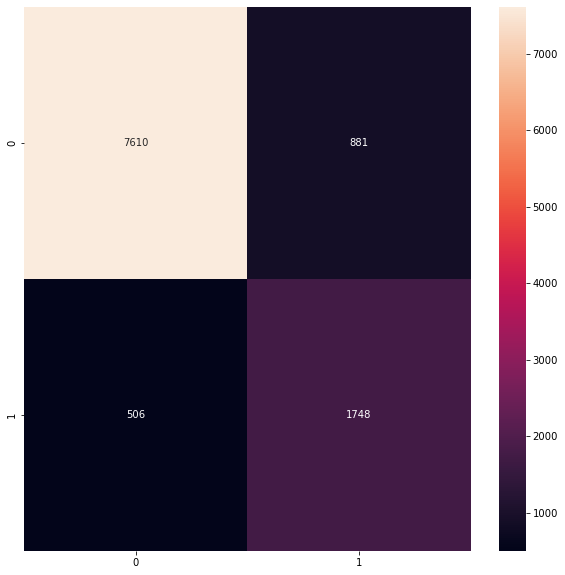

In [52]:
#Graphical representation how well a model performs
cm = confusion_matrix(model_pred,y_test)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [46]:
xg_model = xg.XGBRFClassifier()
xg_model.fit(x_train,y_train)
y_pred = xg_model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8523964634713821

In [47]:
xg_model.score(x_train,y_train)

0.8573458629383451

In [48]:
xg_model.score(x_test,y_test)

0.8523964634713821

In [49]:
#Graphical representation how well a model performs

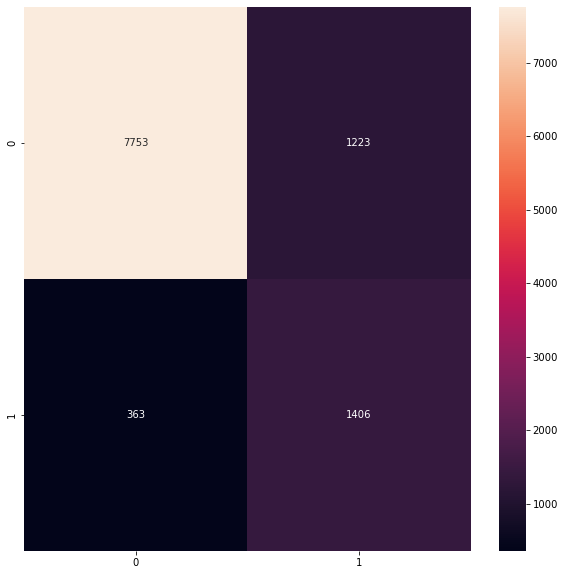

In [71]:
cm = confusion_matrix(y_pred,y_test)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()